In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class k_arm_bandit:
    def __init__(self, K, epsilon):
        self.K = K
        self.epsilon = epsilon
        self.Q = np.array([0] * K)
        self.N = np.array([0] * K)
        self.mean = np.array([2, 1, -1.2, 5, 10, -0.2, 4, 6.8, -5, 0])
        self.cov = np.eye(K)
        
    def pull(self, a):
        return np.random.multivariate_normal(self.mean, self.cov)[a]
    
    def explore_and_exploit(self, rounds=1000):
        reward_sum = 0.
        avg_reward = []
        reward_sum = 0
        for i in range(rounds):
            prob = np.random.uniform(0, 1)
            if prob >= self.epsilon:
                maxes = np.argwhere(self.Q == np.amax(self.Q))
                action = maxes[np.random.randint(0, len(maxes))][0]
            else:
                action = np.random.randint(0, self.K)
            reward = self.pull(action)
            self.N[action] += 1
            self.Q[action] += (1/(self.N[action]) * (reward - self.Q[action])).astype("float")
            reward_sum += reward
            avg_reward.append(reward_sum / i)
            
        return np.array(avg_reward)
    

In [11]:
rounds = 1000
rewards1 = np.zeros((rounds,))
rewards2 = np.zeros((rounds,))
for i in range(2000):
    rewards1 += k_arm_bandit(10, 0.1).explore_and_exploit(rounds)
    rewards2 += k_arm_bandit(10, 0.01).explore_and_exploit(rounds)
rewards1 /= 2000
rewards2 /= 2000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


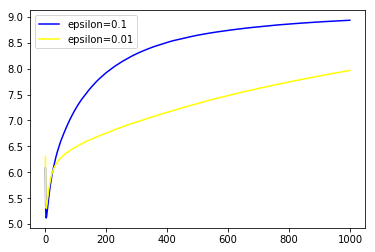

In [12]:
plt.plot(list(range(rounds)), rewards1, c='blue', markersize=0.1)
plt.plot(list(range(rounds)), rewards2, c='yellow', markersize=0.1)
plt.legend(['epsilon=0.1', 'epsilon=0.01'])

In [3]:
class ucb_k_arm_bandit:
    def __init__(self, K, c):
        self.K = K
        self.c = c
        self.Q = np.array([0] * K)
        self.N = np.array([0] * K)
        self.mean = np.array([2, 1, -1.2, 5, 10, -0.2, 4, 6.8, -5, 0])
        self.cov = np.eye(K)
    
    def pull(self, a):
        return np.random.multivariate_normal(self.mean, self.cov)[a]
    
    def explore_and_exploit(self, rounds=1000):
        reward_sum = 0.
        avg_reward = []
        reward_sum = 0
        for i in range(1, rounds+1):
            ucb_estimates = self.Q + self.c * np.sqrt(np.log(i) / (self.N+0.0001))
            maxes = np.argwhere(ucb_estimates == np.amax(ucb_estimates))
            action = maxes[np.random.randint(0, len(maxes))][0]
            reward = self.pull(action)
            self.N[action] += 1
            self.Q[action] += 1/(self.N[action]) * (reward - self.Q[action])
            reward_sum += reward
            avg_reward.append(reward_sum / i)
            
        return np.array(avg_reward)

In [4]:
rounds = 1000
rewards1 = np.zeros((rounds,))
rewards2 = np.zeros((rounds,))
for i in range(2000):
    rewards1 += ucb_k_arm_bandit(10, 2).explore_and_exploit(rounds)
    rewards2 += k_arm_bandit(10, 0.1).explore_and_exploit(rounds)
rewards1 /= 2000
rewards2 /= 2000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  


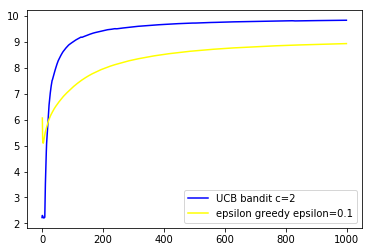

In [10]:
plt.plot(list(range(rounds)), rewards1, c='blue', markersize=0.1)
plt.plot(list(range(rounds)), rewards2, c='yellow', markersize=0.1)
plt.legend(['UCB bandit c=2', 'epsilon greedy epsilon=0.1'])